In [6]:
from IPython.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))

In [7]:
from abc import ABC, abstractmethod
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_2009_2010=pd.read_excel(r"C:\Users\soura\Downloads\customer_transactions_sample.xlsx",sheet_name='Year 2009-2010',engine='openpyxl')
df_2010_2011=pd.read_excel(r"C:\Users\soura\Downloads\customer_transactions_sample.xlsx",sheet_name='Year 2010-2011',engine='openpyxl')
# df_2009_2010.head(40)

In [8]:
df=pd.concat([df_2009_2010,df_2010_2011],axis=0,ignore_index=True)
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64


In [10]:
# Validate data consistency
neg_df = df[(df['Quantity'] < 0) | (df['Price'] < 0)]
negative_values = len(neg_df)
print("\nEntries with Negative Values:" , negative_values)
display(neg_df)


Entries with Negative Values: 22955


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [11]:
# Identify duplicates
duplicate_invoices = df[df.duplicated(subset=['Invoice'], keep=False)]
print("\nDuplicate Invoices:", len(duplicate_invoices))
display(duplicate_invoices)


Duplicate Invoices: 1054077


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [12]:
# Examine the distribution of countries
country_distribution = df['Country'].value_counts()
print("\nCountry Distribution:")
display(country_distribution)


Country Distribution:


Country
United Kingdom          981330
EIRE                     17866
Germany                  17624
France                   14330
Netherlands               5140
Spain                     3811
Switzerland               3189
Belgium                   3123
Portugal                  2620
Australia                 1913
Channel Islands           1664
Italy                     1534
Norway                    1455
Sweden                    1364
Cyprus                    1176
Finland                   1049
Austria                    938
Denmark                    817
Unspecified                756
Greece                     663
Japan                      582
Poland                     535
USA                        535
United Arab Emirates       500
Israel                     371
Hong Kong                  364
Singapore                  346
Malta                      299
Iceland                    253
Canada                     228
Lithuania                  189
RSA                        169


In [13]:
# Cleanse the dataset
# Remove or impute missing values
df.dropna(inplace=True)

# Remove outliers
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

# Standardize InvoiceDate format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create derived feature: Total Sales Amount
df['TotalSales'] = df['Quantity'] * df['Price']


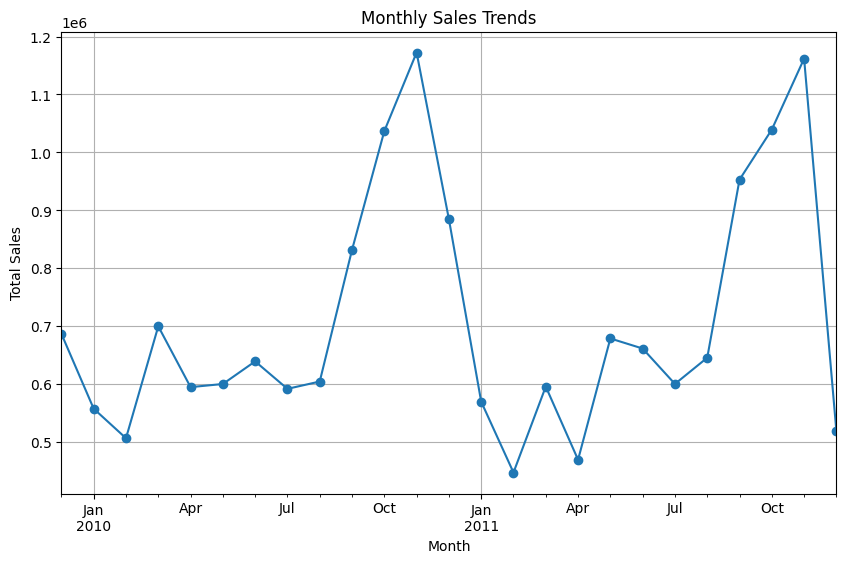

In [14]:
# Plot monthly sales trends
monthly_sales = df.resample('M', on='InvoiceDate')['TotalSales'].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [15]:
# Identify top-selling products
top_selling_products = df.groupby('Description', as_index=False).agg({'Quantity': 'sum', 'TotalSales': 'sum'}).sort_values(by='Quantity', ascending=False).head(10)
top_selling_products = top_selling_products.reset_index(drop=True)
top_10 = top_selling_products['Description'].to_list()
print("\nTop 10 Selling Products:", top_10)
print("\nDetailed View:")
display(top_selling_products)


Top 10 Selling Products: ['WORLD WAR 2 GLIDERS ASSTD DESIGNS', 'WHITE HANGING HEART T-LIGHT HOLDER', 'PAPER CRAFT , LITTLE BIRDIE', 'ASSORTED COLOUR BIRD ORNAMENT', 'MEDIUM CERAMIC TOP STORAGE JAR', 'JUMBO BAG RED RETROSPOT', 'BROCADE RING PURSE ', 'PACK OF 60 PINK PAISLEY CAKE CASES', '60 TEATIME FAIRY CAKE CASES', 'PACK OF 72 RETROSPOT CAKE CASES']

Detailed View:


,Description,Quantity,TotalSales
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,109169,24905.87
1,WHITE HANGING HEART T-LIGHT HOLDER,93640,252072.46
2,"PAPER CRAFT , LITTLE BIRDIE",80995,168469.60
3,ASSORTED COLOUR BIRD ORNAMENT,79913,127074.17
4,MEDIUM CERAMIC TOP STORAGE JAR,77916,81416.73
5,JUMBO BAG RED RETROSPOT,75759,136980.08
6,BROCADE RING PURSE,71129,14827.71
7,PACK OF 60 PINK PAISLEY CAKE CASES,55270,26733.45
8,60 TEATIME FAIRY CAKE CASES,53495,26121.57
9,PACK OF 72 RETROSPOT CAKE CASES,46107,22214.26


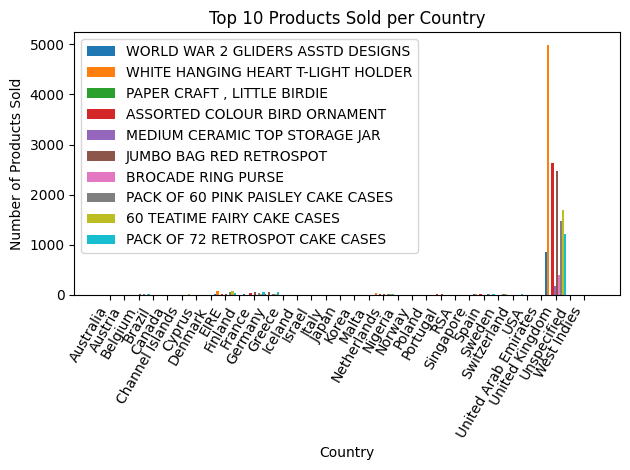

In [34]:
# Identify top-selling products over the different countries
top_selling_products = df.groupby('Description', as_index=False).agg({'Quantity': 'sum', 'TotalSales': 'sum'}).sort_values(by='Quantity', ascending=False).head(10)
top_selling_products = top_selling_products.reset_index(drop=True)
top_10 = top_selling_products['Description'].to_list()
# Filter the DataFrame to include only the top 10 selling products
df_top_products = df[df['Description'].isin(top_10)]

# Group the data by 'Country' and count the occurrences of each product
grouped = df_top_products.groupby(['Country', 'Description']).size().unstack(fill_value=0)

# Plot the results
bar_width = 0.15
index = np.arange(len(grouped.index))

for i, product in enumerate(top_10):
    plt.bar(index + i * bar_width, grouped[product], bar_width, label=product)

plt.xlabel('Country')
plt.ylabel('Number of Products Sold')
plt.title('Top 10 Products Sold per Country')
plt.xticks(index + (len(top_10) / 2 - 0.5) * bar_width, grouped.index, rotation=60, ha = 'right')  # Adjust x-axis ticks
plt.legend()
plt.tight_layout()
plt.show()

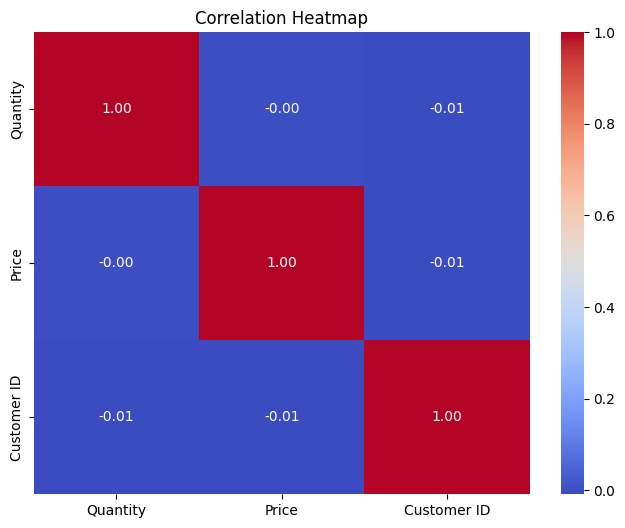

In [16]:
# Heatmap showing correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'Price', 'Customer ID']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Segment customers
customer_segments = df.groupby('Customer ID').agg({'Invoice': 'nunique', 'TotalSales': 'mean'}).reset_index()
customer_segments.rename(columns={'Invoice': 'Frequency', 'TotalSales': 'AvgOrderValue'}, inplace=True)
print("\nCustomer Segments:")
display(customer_segments)


Customer Segments:


,Customer ID,Frequency,AvgOrderValue
0,12346.0,12,2281.072353
1,12347.0,8,22.266087
2,12348.0,5,39.596078
3,12349.0,4,25.306800
4,12350.0,1,19.670588
...,...,...,...
5873,18283.0,22,2.775507
5874,18284.0,1,16.488571
5875,18285.0,1,35.583333
5876,18286.0,2,19.349701


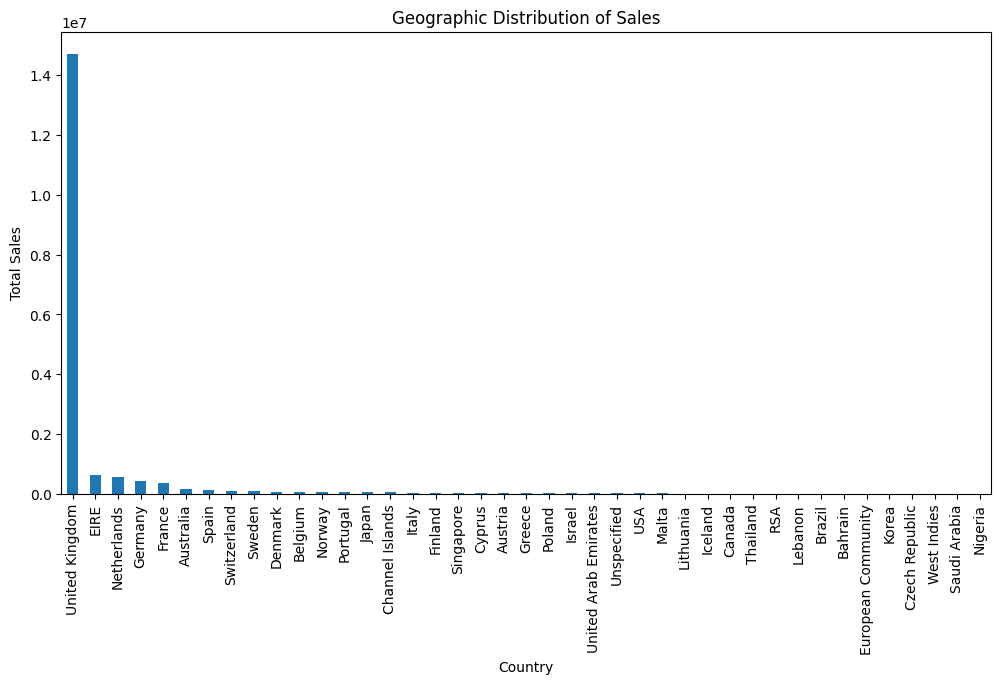

In [23]:
# Geographic distribution
plt.figure(figsize=(12, 6))
country_sales = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
country_sales.plot(kind='bar')
plt.title('Geographic Distribution of Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [26]:
# Analyze customer churn rates
# Assuming churn as customers who haven't made a purchase in the last 12 months
last_date = df['InvoiceDate'].max()
six_months_ago = last_date - pd.DateOffset(months=12)
active_customers = df[df['InvoiceDate'] >= six_months_ago]['Customer ID'].nunique()
total_customers = df['Customer ID'].nunique()
churn_rate = 1 - (active_customers / total_customers)
print("\nChurn Rate:", churn_rate)

# Recommendations to the CEO
print("\nRecommendations to the CEO:")
print("1. Implement targeted marketing campaigns based on top-selling products and customer segments.")
print("2. Enhance customer experience by personalizing services and promotions using customer segmentation.")
print("3. Optimize inventory management using sales trends and product performance insights.")


Churn Rate: 0.273732562095951

Recommendations to the CEO:
1. Implement targeted marketing campaigns based on top-selling products and customer segments.
2. Enhance customer experience by personalizing services and promotions using customer segmentation.
3. Optimize inventory management using sales trends and product performance insights.
